/Users/patrick/Documents/Projects/ECE4191-E5-tennibot
Not running on Raspberry Pi. GPIO library not imported.
Not running on Raspberry Pi. GPIO library not imported.
Logger name: robot_core.orchestration.orchestrator_mp.Orchestrator
Logger level: 0
Logger handlers: []
Logger parent: <RootLogger root (INFO)>
Coordinator Process (PID: 438) running with: 13 threads


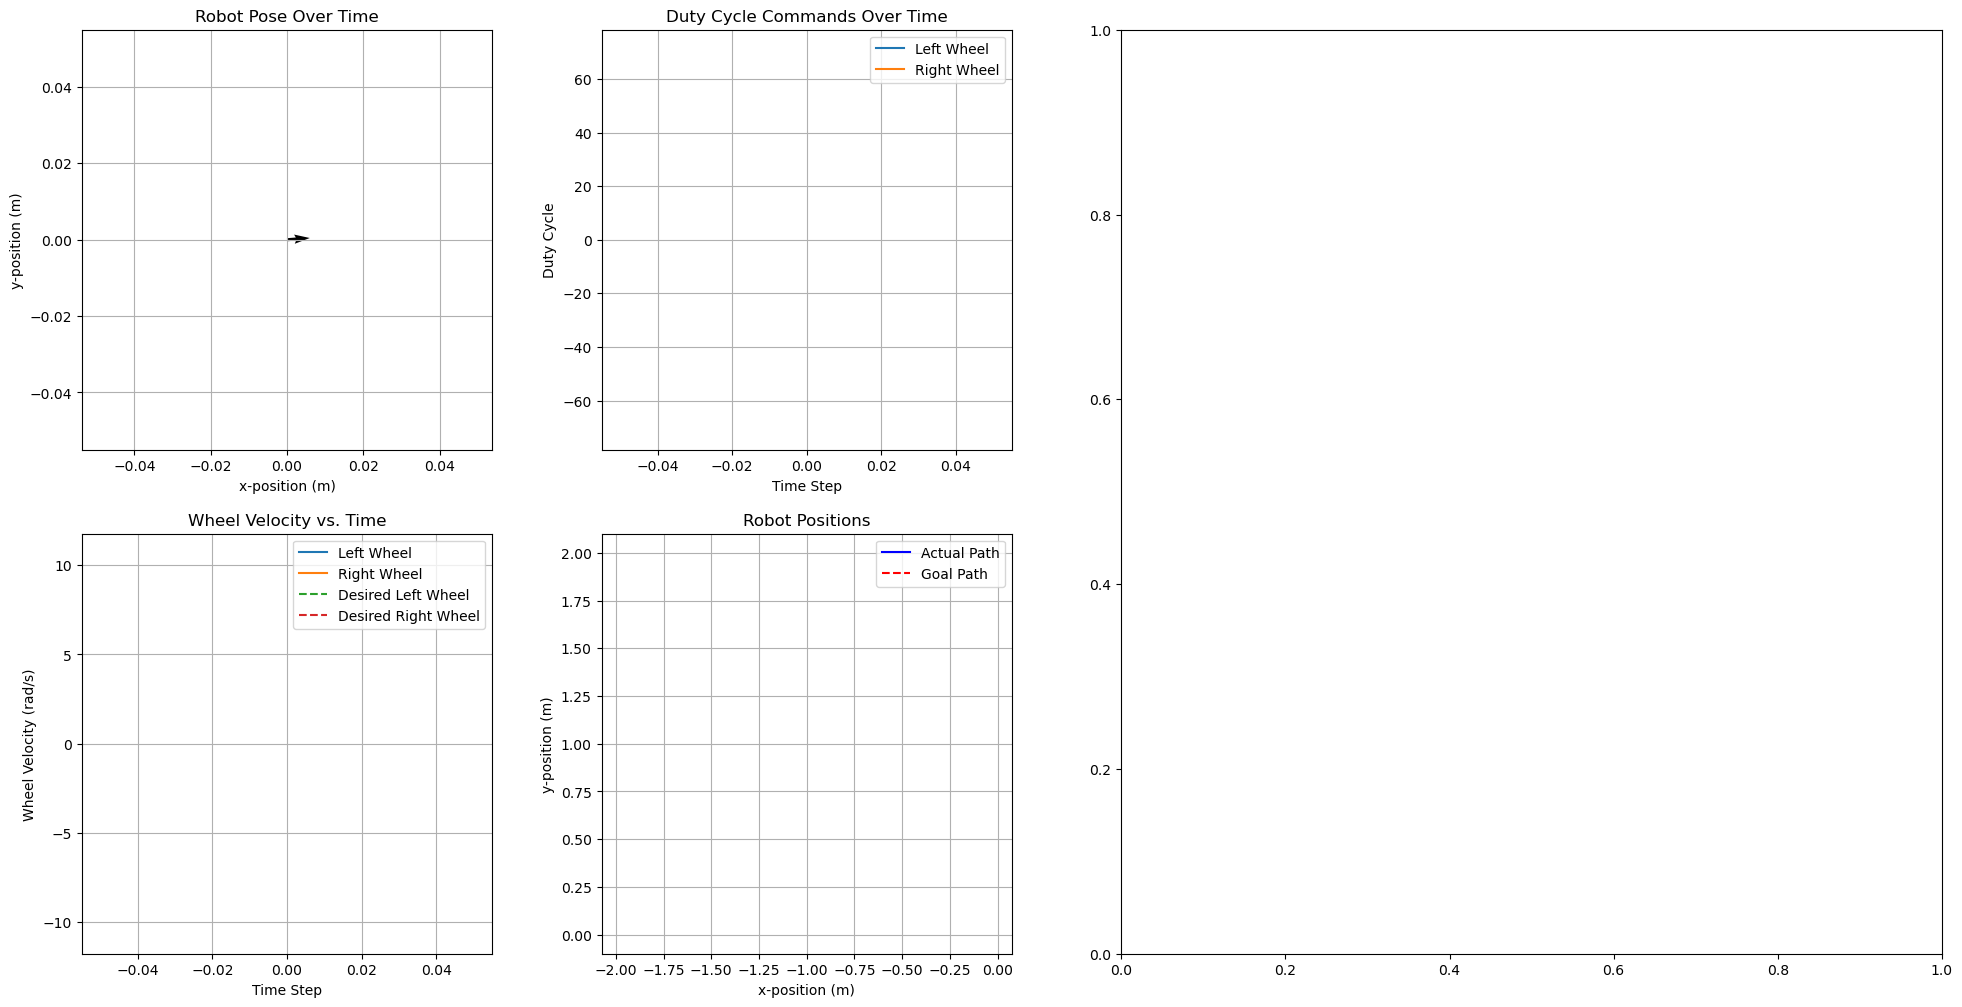

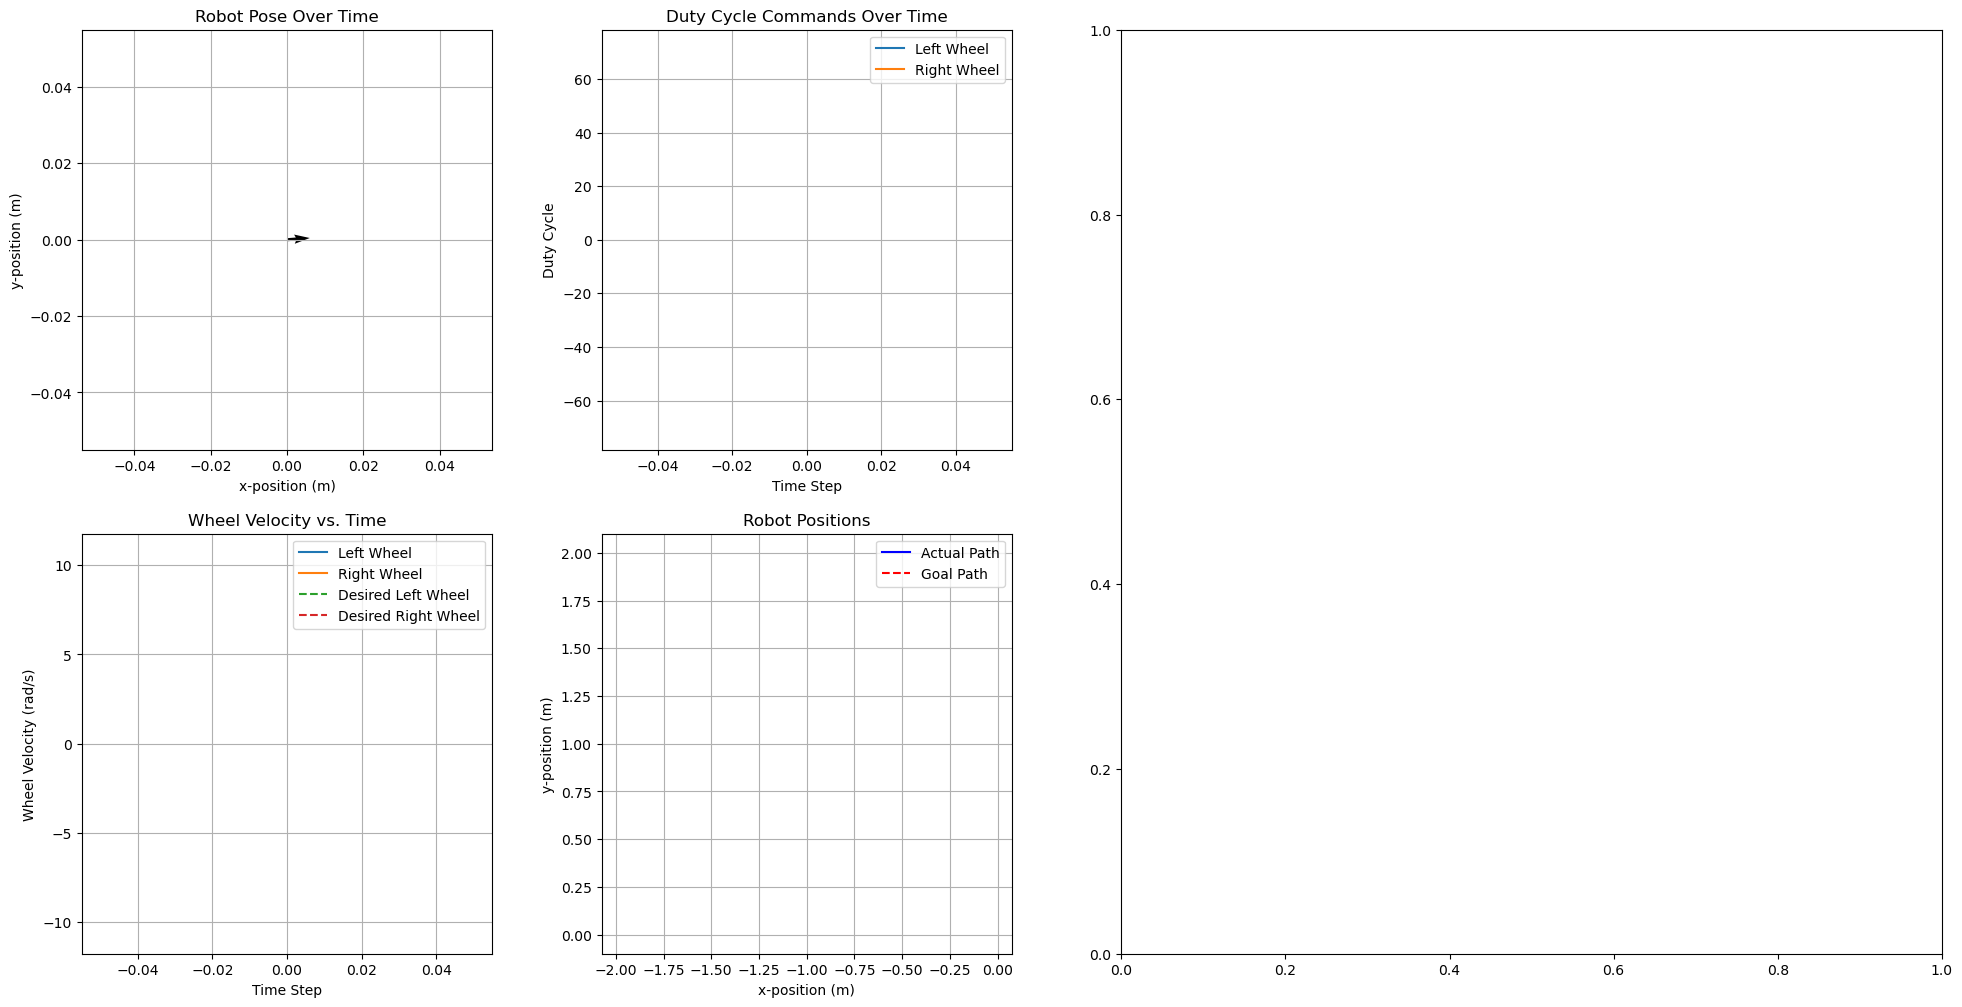

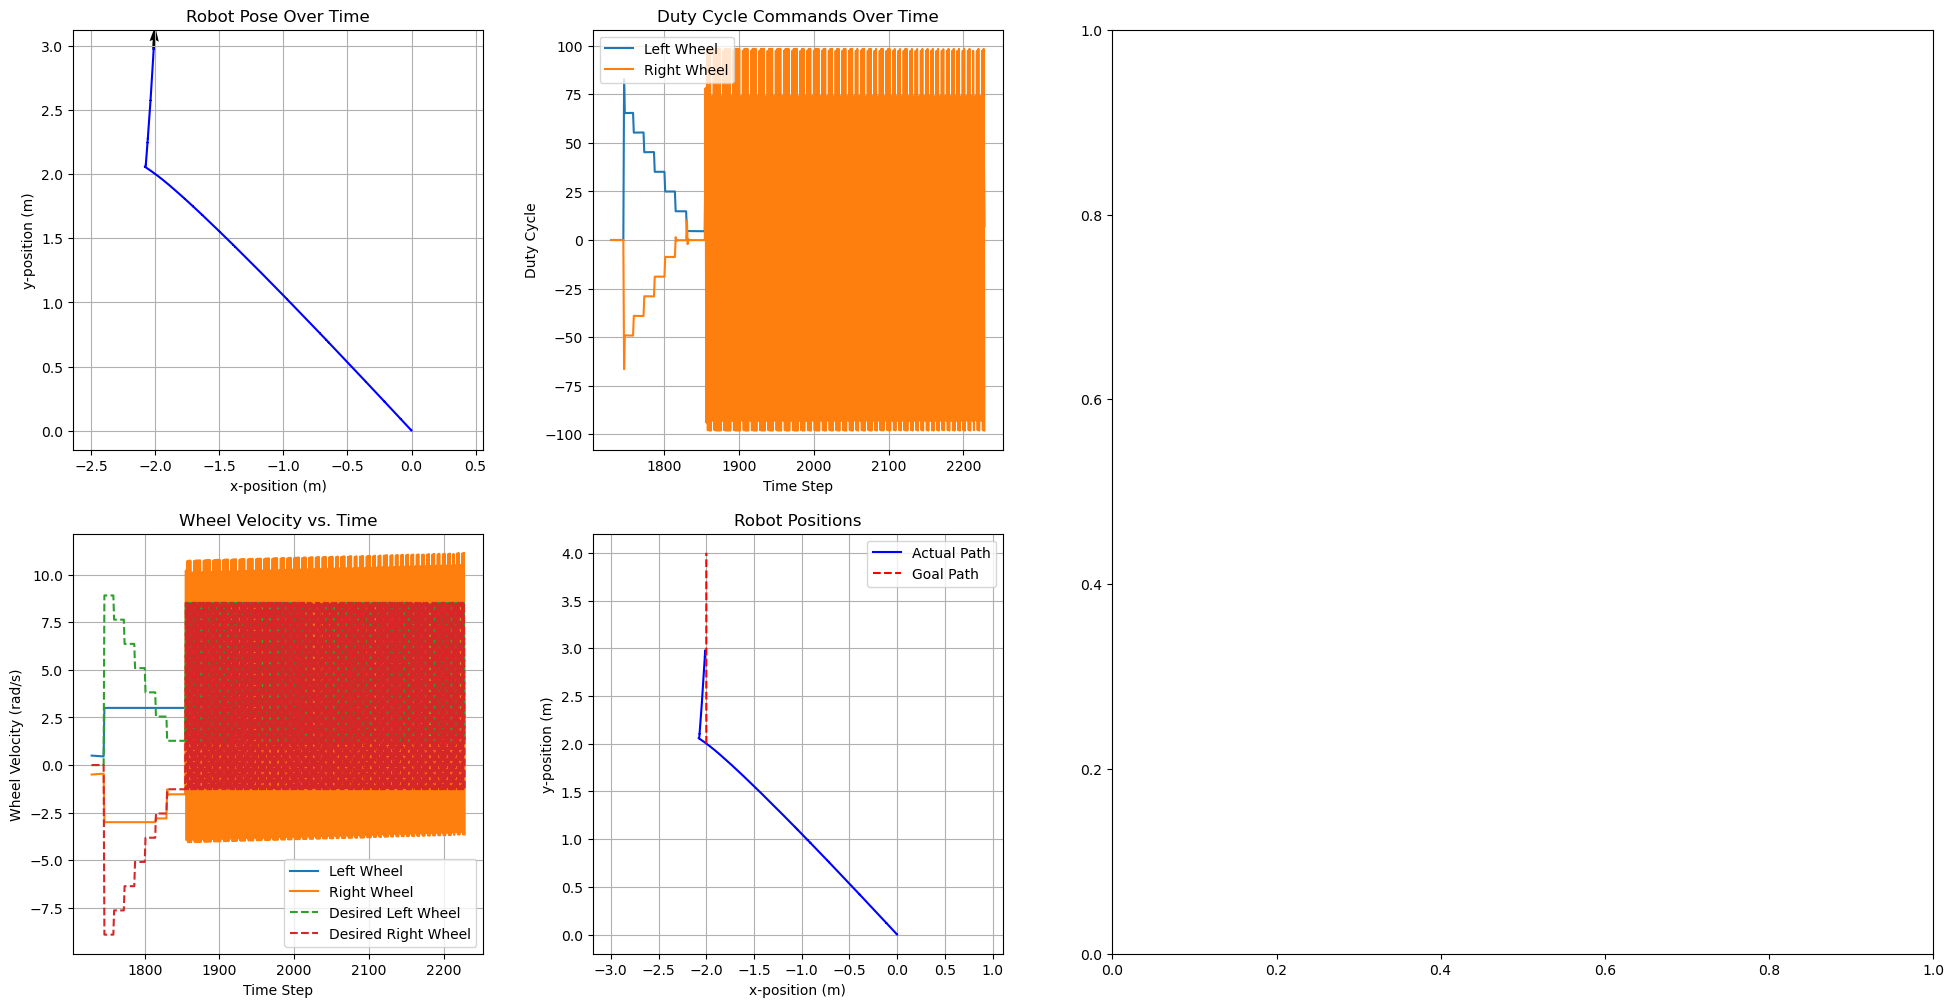

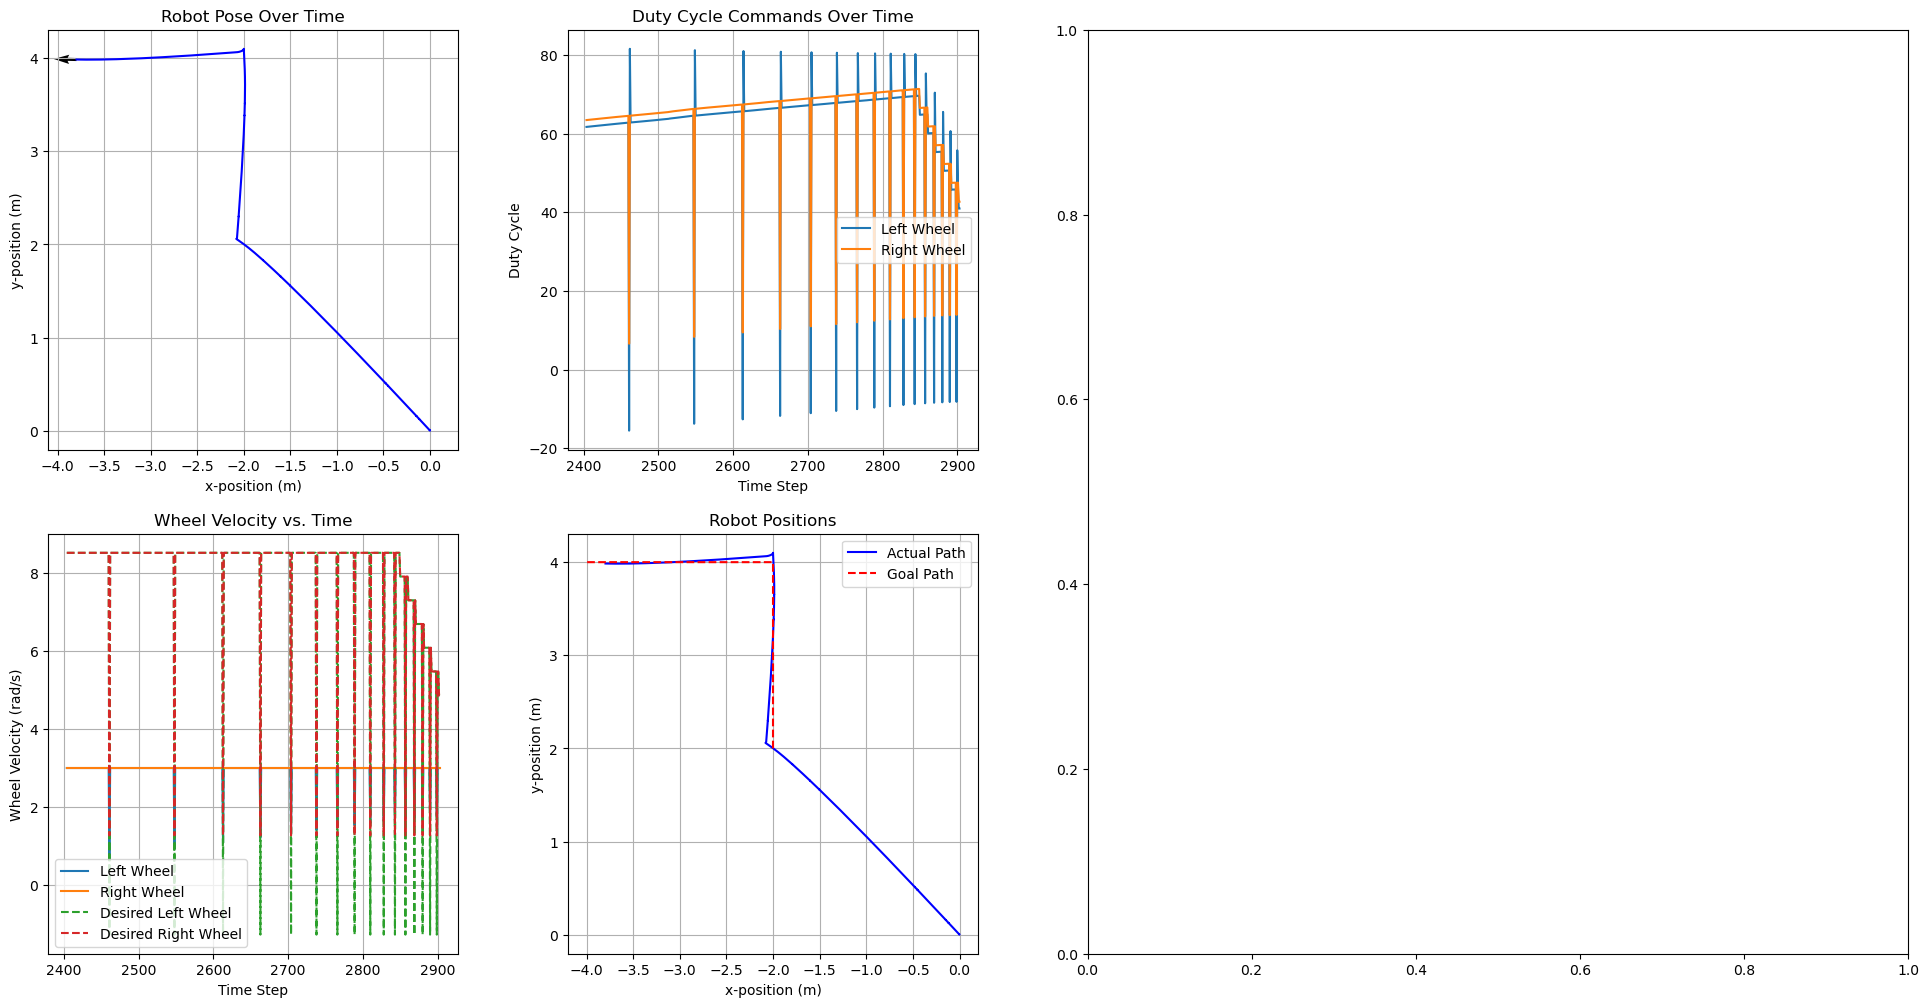

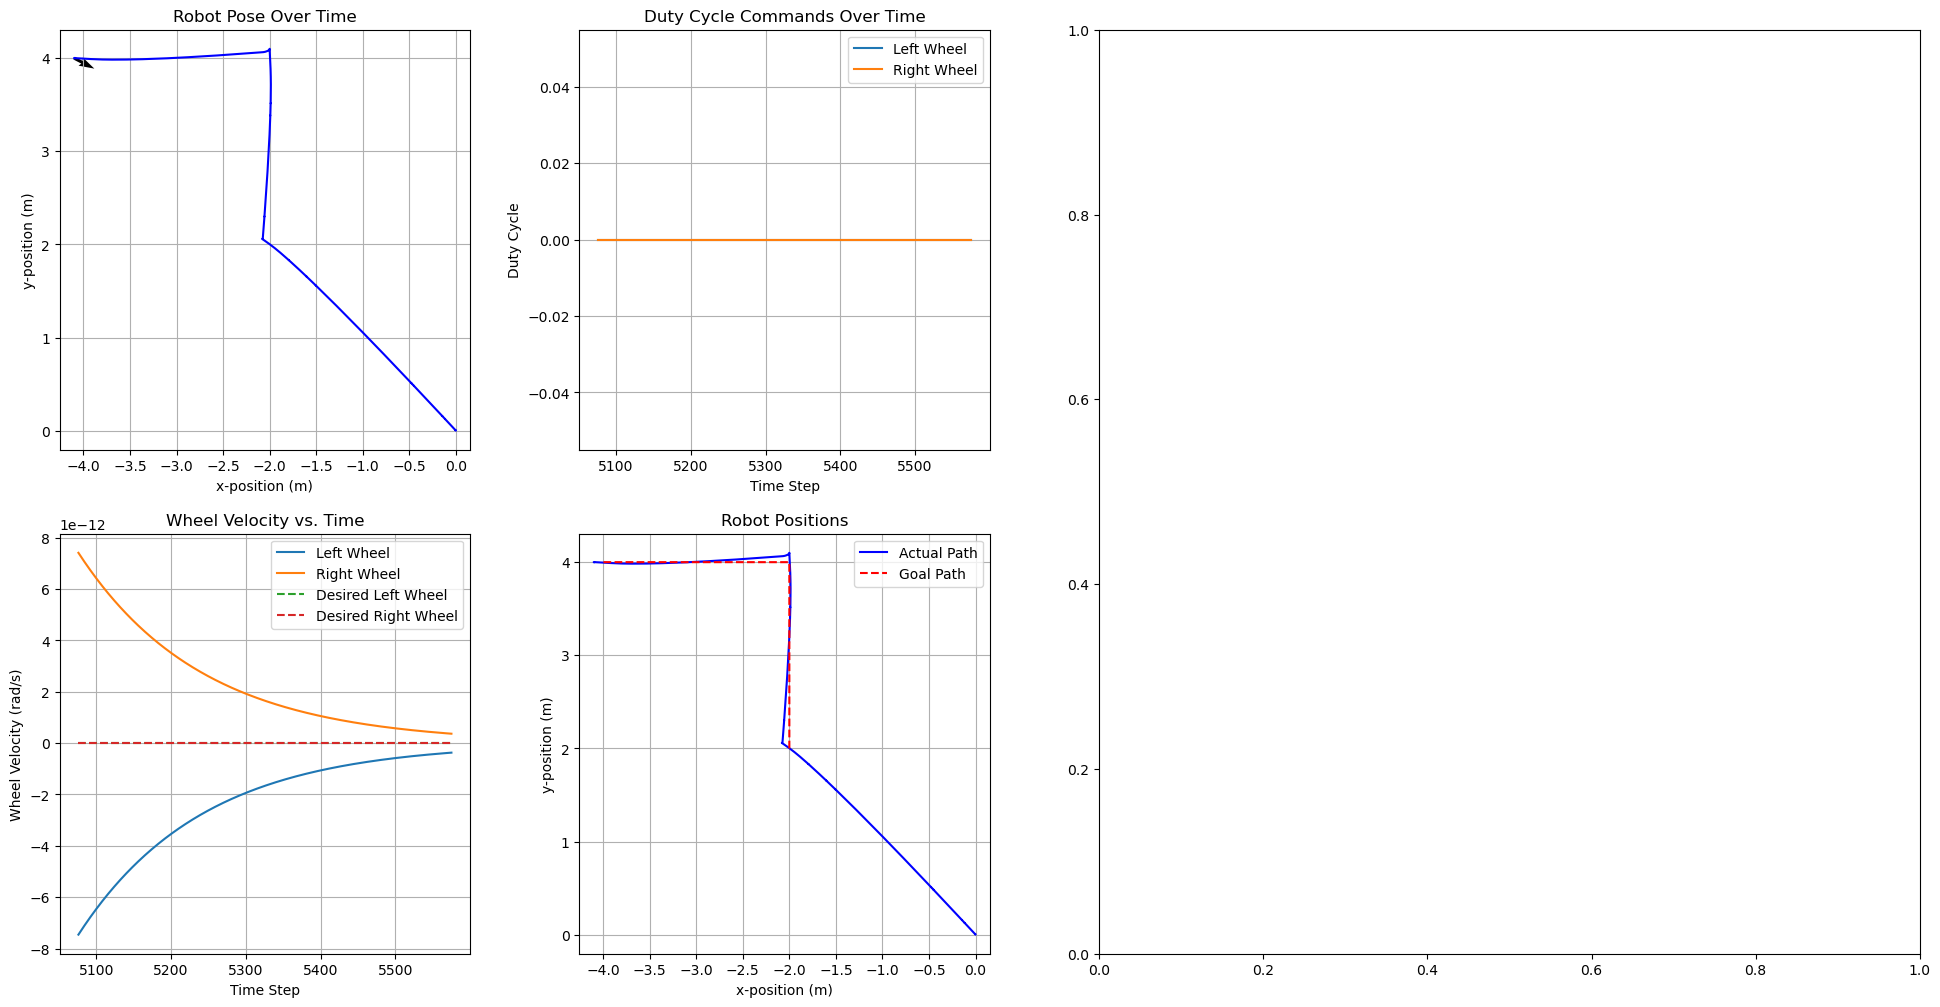

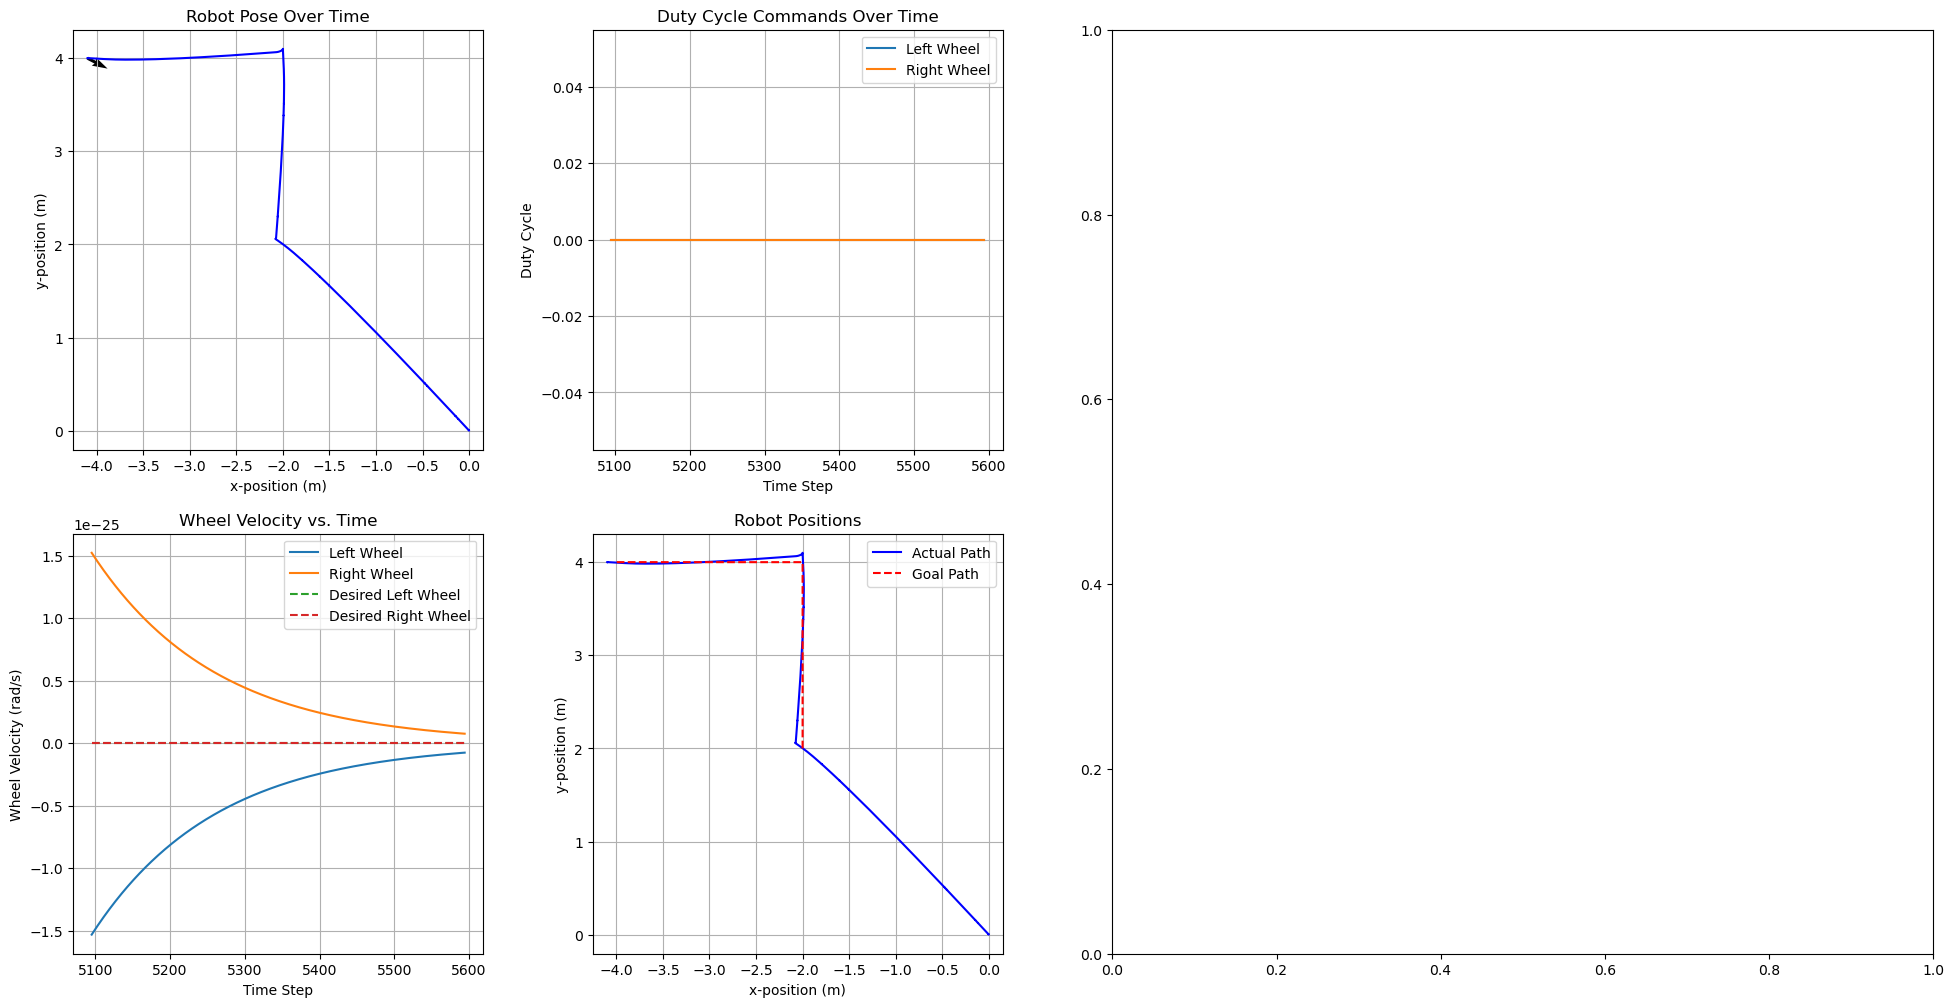

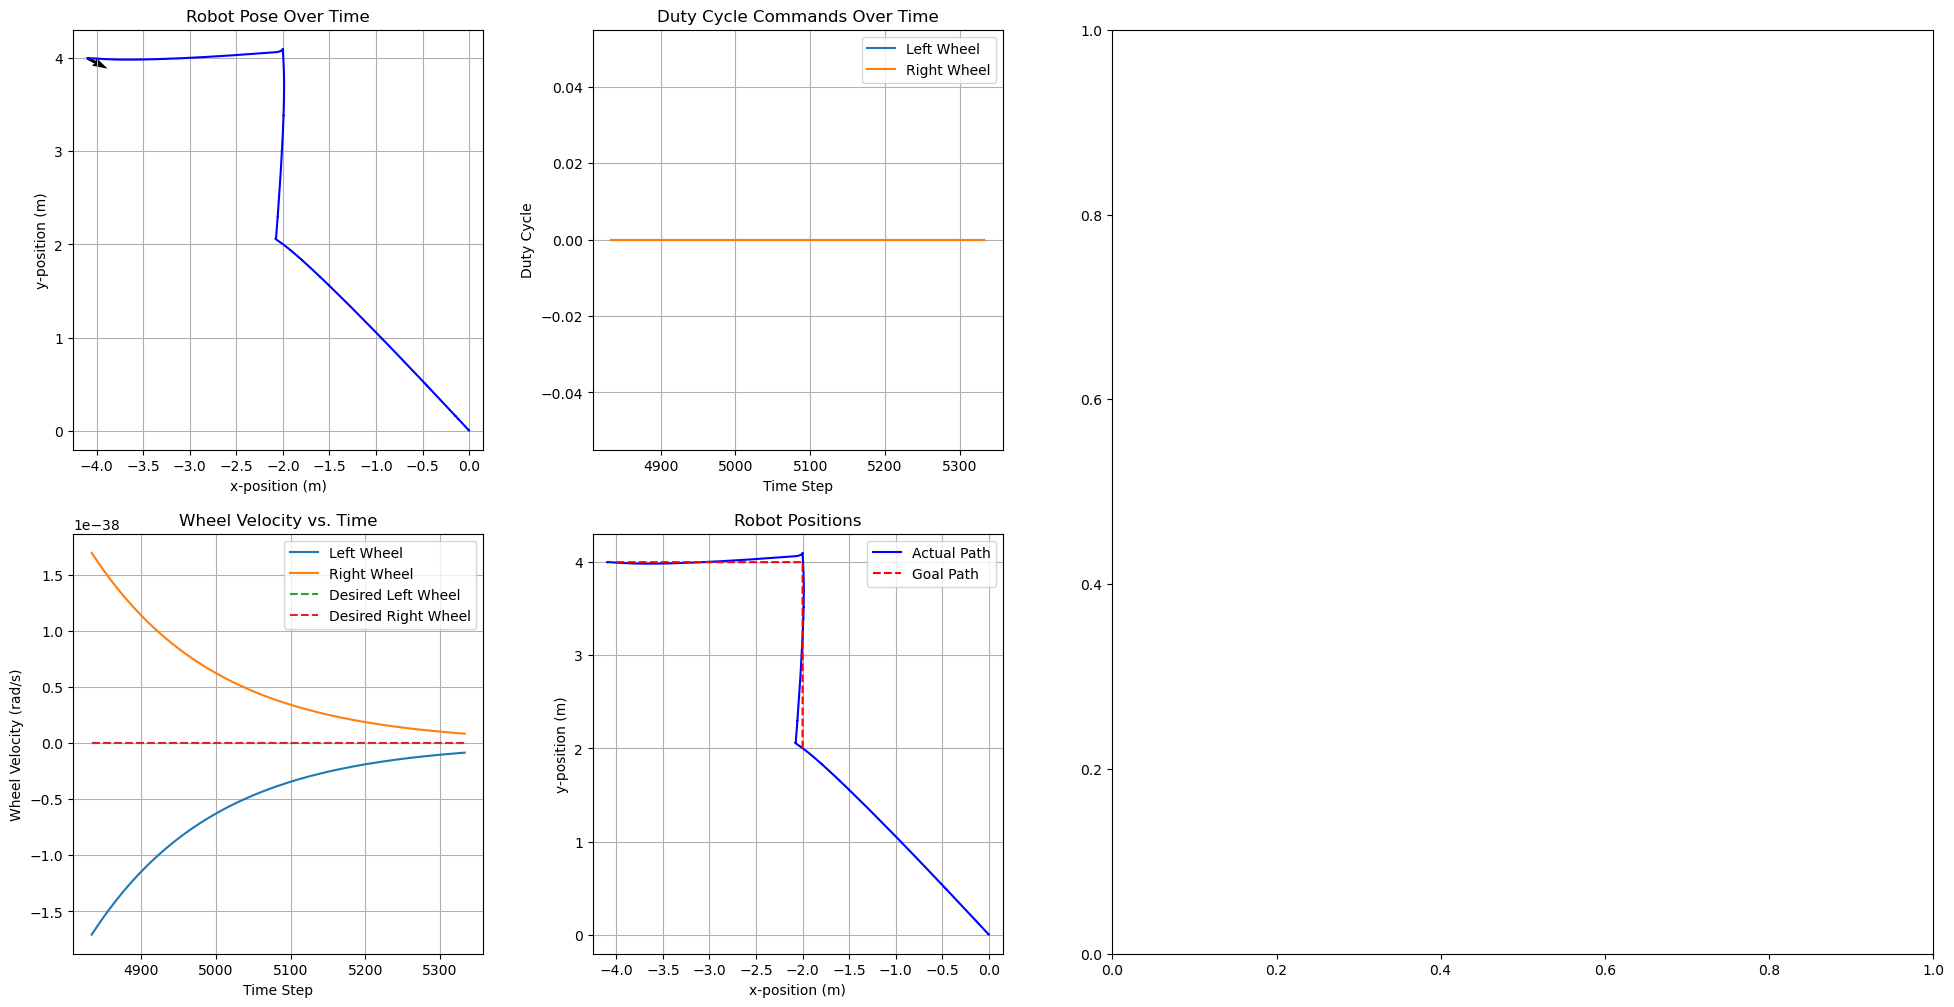

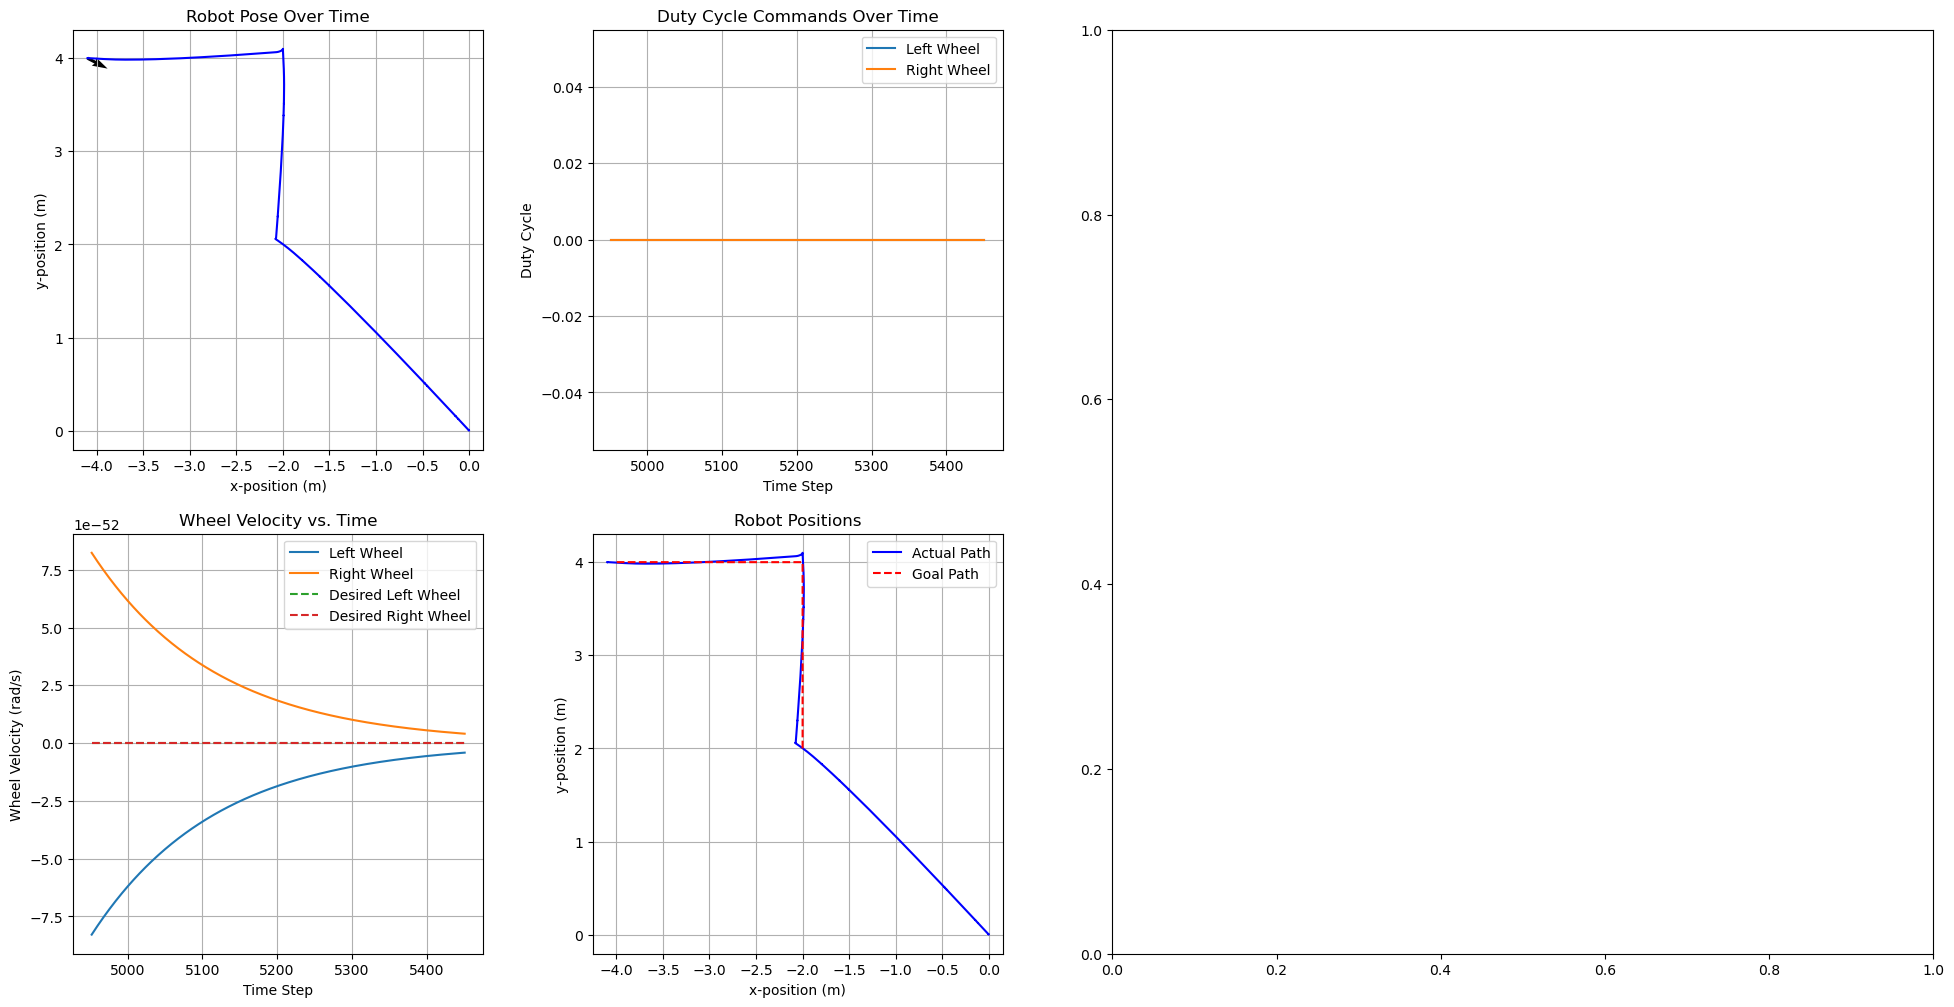

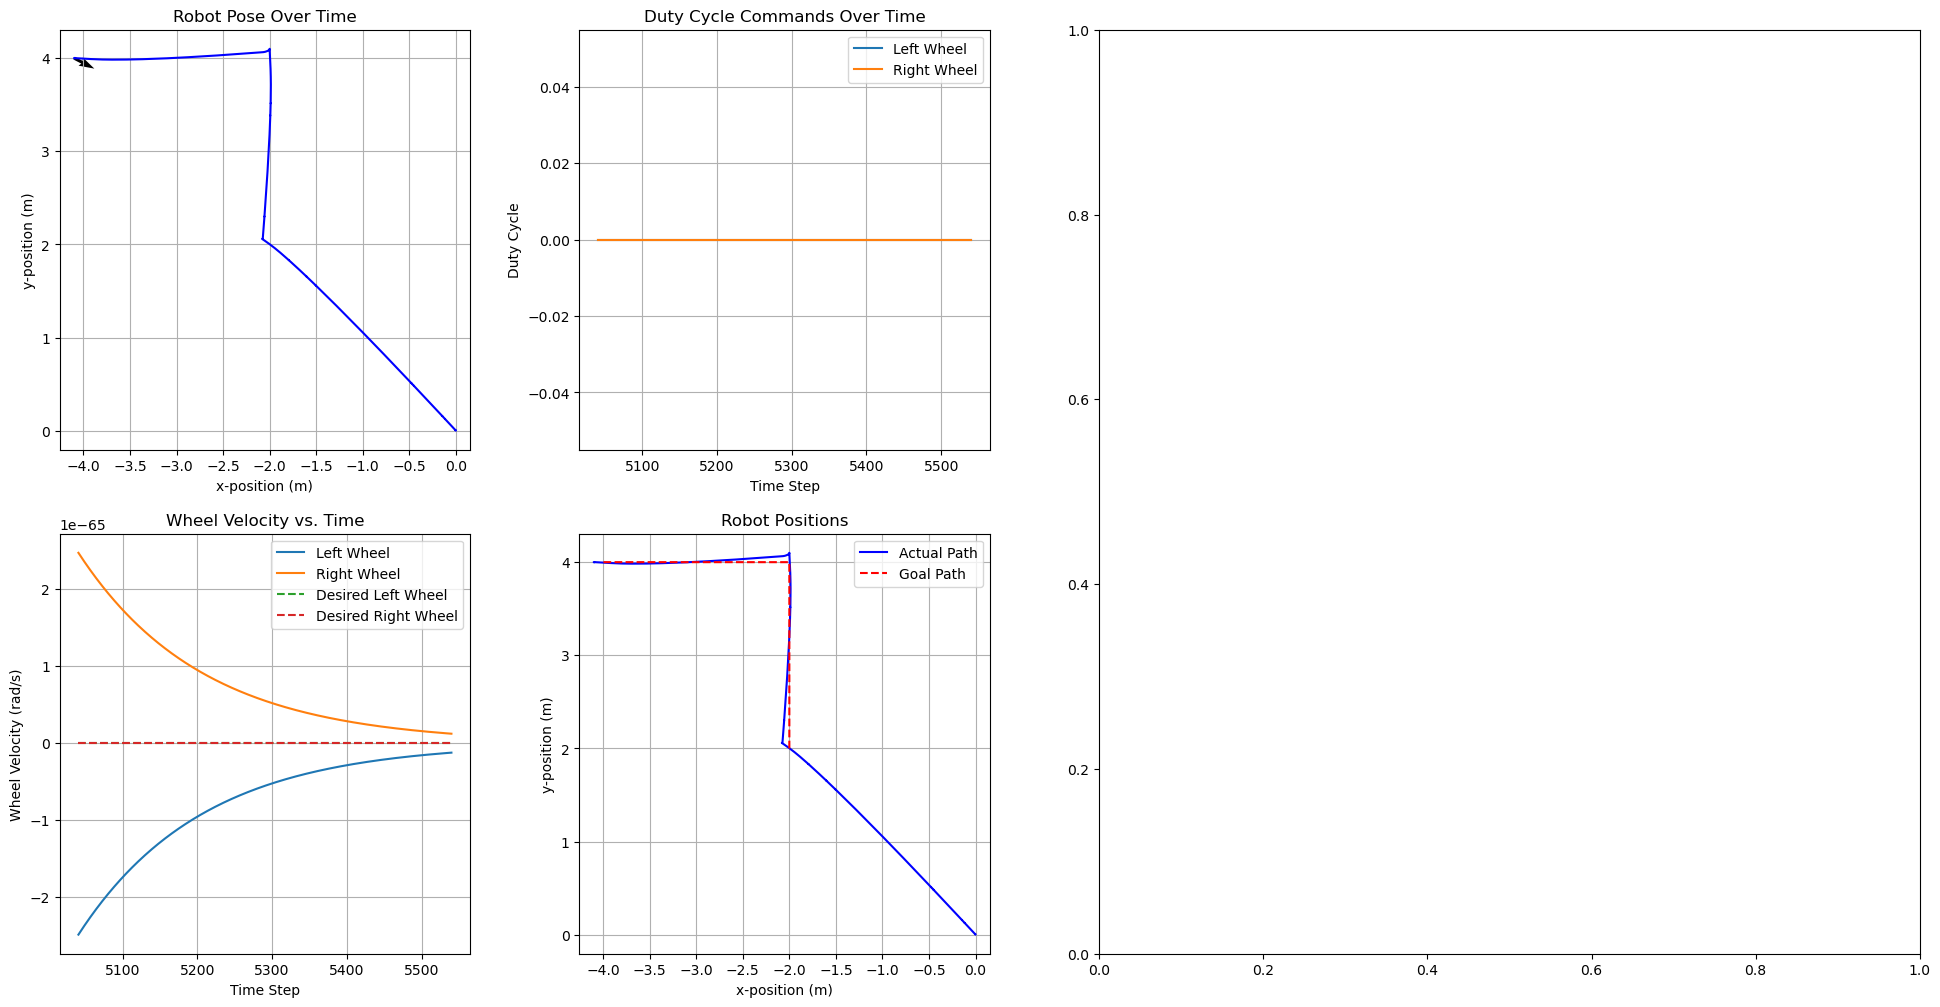

Orchestrator Process (PID: 451) running with: 10 threads
    Initialised simulated robot.
************ Orchestrator: New goal received! PositionData(x=-2.0, y=2.0, th=2.356194490192345, is_ball=False)
************ Orchestrator: New goal received! PositionData(x=-2.0, y=4.0, th=1.530703418183322, is_ball=False)
************ Orchestrator: New goal received! PositionData(x=-4.0, y=4.0, th=-3.0928835250946003, is_ball=False)


In [1]:
import os, sys
# print(f"{os.getcwd()}")
# sys.path.append(os.getcwd())
current_dir = os.getcwd()
ECE_tenni_dir = os.path.abspath(os.path.join(current_dir, "..", ".."))
print(ECE_tenni_dir)
sys.path.append(ECE_tenni_dir)

try: # Import the GPIO library. If it fails, we assume we are running on a non-Raspberry Pi system.
    import RPi.GPIO as GPIO
    import gpiozero
except ImportError:
    print("Not running on Raspberry Pi. GPIO library not imported.")
    pass

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()  # Turn on interactive mode

from robot_core.coordinator.ProcessCoordinator import Coordinator
from robot_core.utils.robot_plotter import RobotPlotter

###############################################################################

coordinator = Coordinator(simulate=True, live_graphs=True, graph_interval=1, log=False, clear_output=False)
coordinator.run()
